<a href="https://colab.research.google.com/github/Barleysack/tensor101/blob/Table/Reconstruct_to_image_RU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorboard

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train_reshaped=tf.reshape(X_train,(55000,784))
X_valid_reshaped=tf.reshape(X_valid,(5000,784))
X_test_reshaped=tf.reshape(X_test,(10000,784))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_valid_scaled = scaler.transform(X_valid_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)



class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z


X_new_scaled = X_test_scaled
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.flat1= keras.layers.Flatten()
        self.hidden1 = keras.layers.Dense(30, activation="elu",
                                          kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)


block1 = ResidualBlock(2, 30)
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,
    ResidualBlock(2, 30),
    keras.layers.Dense(1)
])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
callback=tensorboard_callback
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=30 ,callbacks=callback)
  


1719/1719 [==============================] - 3s 2ms/step - loss: 0.1734
Epoch 20/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1493
Epoch 21/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1556
Epoch 22/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1448
Epoch 23/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1306
Epoch 24/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1183
Epoch 25/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1452
Epoch 26/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1397
Epoch 27/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1224
Epoch 28/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1230
Epoch 29/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1189
Epoch 30/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1086


In [ ]:
x_image=model.predict(X_test_scaled)

In [34]:
X_result=tf.reshape(X_test_scaled,(10000,28,28))

In [41]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def show_reconstructions(model, images=X_result, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
    return

TypeError: ignored

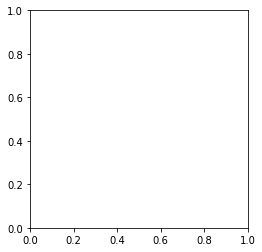

In [44]:
plt.imshow(X_result,"binary")